In [1]:
import numpy as np
import pickle
from build_database import flux_obj
from scipy import interpolate
# from sklearn.svm import SVR
# from sklearn.svm import NuSVR
from matplotlib import pyplot as plt
from coordinate_structure import coordinate_structure
from precip_model import precip_model
%matplotlib inline

In [ ]:
with open('database_counts.pkl','rb') as file:
    db = pickle.load(file)

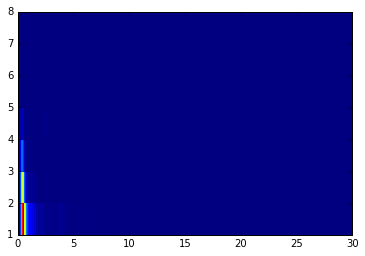

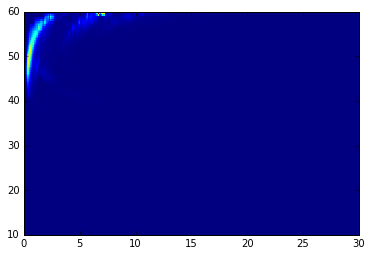

In [10]:
m = precip_model(database="database_saturday.pkl",multiple_bands=True)
t = np.linspace(0,30,500)
in_lat = 35
tmp = np.array([m.get_multiband_precip_at(in_lat,50,x,t) for x in m.E_bands])
plt.pcolor(t, m.E_bands, tmp)
plt.show()
    
tmp = np.array([m.get_precip_at(in_lat,L,t) for L in np.linspace(10,60,128)])
plt.pcolor(t, np.linspace(10,60,128), tmp)
plt.show()

In [ ]:
def tile_keys(key1, key2):
    return np.vstack([np.outer(key1, np.ones(np.size(key2))), key2]).T

print db.keys()

in_lats = sorted(db.keys())
obj = db[30]
# plt.pcolor(obj.t, obj.coords.lat(),np.log10(obj.N.T))
# plt.clim([-4,4])
#plt.show()

N = []
for i in in_lats:
    obj = db[i]
    N.append(obj.N)

N = np.array(N)
N = N.swapaxes(1,2)
print np.shape(N)
interp = interpolate.RegularGridInterpolator((in_lats, obj.coords.lat(),obj.t), N)


out_lats = np.linspace(30,70,60)
res = [] #np.empty([np.size(out_lats), np.size(obj.t)])

t = np.linspace(0,30,100)
in_lat = 10
for o in out_lats:
    points = tile_keys((in_lat,o),t)
    
    res.append(interp(points))

print np.shape(res)
res = np.log10(np.array(res))
    # print points
# print np.shape(points)

# tmp = interp(points)
# print points[:,0]
plt.pcolor(t, out_lats, res)
plt.clim([-4,4])



In [ ]:
data = []

for i in in_lats:
    print i
    obj = db[i]
    data.append(obj.N)
N = np.array(N)
print np.shape(N)
N = N.swapaxes(1,2)
print np.shape(N)
print np.shape(data)